In [1]:
import pandas as pd
import numpy as np
import random
from scipy import stats

df = pd.read_csv("/Users/ekarimi/PycharmProjects/saumap/SATSNE2019-master/toyData.csv", index_col=0)

glob = np.random.normal(loc=0, scale=30, size=200*df.shape[1]).reshape(-1,4)
glob += np.tile([0,0,100,100],200).reshape(-1,4)
timepoint_a = list(pd.cut(df['V1'], 3, labels=False))
timepoint_b = random.choices([0,1,2],k=glob.shape[0])
timepoint = np.array(timepoint_a+timepoint_b)
toydata = df.values
toydata1 = np.concatenate((toydata,glob))
toydata2 = np.concatenate((toydata,glob))

ix1 = random.choices([i for i in range(toydata1.shape[0])],k=800)
ix2 = random.choices([i for i in range(toydata2.shape[0])],k=1200)
Y1 = toydata1[ix1,:]
Y2 = toydata2[ix2,:]
Y1 = stats.zscore(Y1)
Y2 = stats.zscore(Y2)
timepoint1 = timepoint[ix1].reshape((len(ix1),1))
timepoint2 = timepoint[ix2].reshape((len(ix2),1))
ngenes1 = 100
ncells1 = Y1.shape[0]
np.random.seed(0)
proj1 = np.random.normal(size = ngenes1*Y1.shape[1]).reshape(ngenes1,Y1.shape[1])
A1 =  np.dot(Y1,proj1.T) + np.random.normal(size = ncells1*ngenes1).reshape(ncells1,ngenes1)
ngenes2 = 200
ncells2 = Y2.shape[0]
np.random.seed(10)
proj2 = np.random.normal(size = ngenes2*Y2.shape[1]).reshape(ngenes2,Y2.shape[1])
A2 =  np.dot(Y2,proj2.T) + np.random.normal(size = ncells2*ngenes2).reshape(ncells2,ngenes2)

X1shared = timepoint1.reshape(-1,1)
X2shared = timepoint2.reshape(-1,1)

# path = 'output/'
# np.savetxt(path+ "A1.txt", A1)
# np.savetxt(path+ "A2.txt", A2)
# np.savetxt(path+ "timepoint1.txt", timepoint1)
# np.savetxt(path+ "timepoint2.txt", timepoint2)

X1 = A1[:, :-1]
X2 = A2[:, :-1]

In [2]:
from tsne_mmd import *

In [11]:
n_repeat = 1
ts1_list, ts2_list ,time_list = generate_results(X1, X2, n_repeat, no_dims=2, perplexity=100, max_iter=1000)

********** replication:1 ********
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 800...
Computing P-values for point 500 of 800...
Mean value of sigma: 5.591136
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1200...
Computing P-values for point 500 of 1200...
Computing P-values for point 1000 of 1200...
Mean value of sigma: 5.338930
Iteration 10: error is 11.139283
Iteration 10: error is 13.321599
Iteration 20: error is 8.914281
Iteration 20: error is 10.668497
Iteration 30: error is 8.138020
Iteration 30: error is 9.528497
Iteration 40: error is 8.063908
Iteration 40: error is 9.065562
Iteration 50: error is 8.146739
Iteration 50: error is 8.979928
Iteration 60: error is 8.054425
Iteration 60: error is 9.049699
Iteration 70: error is 8.043825
Iteration 70: error is 8.995175
Iteration 80: error is 8.046000
Iteration 80: error is 8.981992
Iteration 90: error is 8.034892
Iteratio

In [15]:
import matplotlib.pyplot as plt 
import pylab
def final_embedding_plot(ts1, ts2, c1, c2):
    '''
    plotting 2D embeddings for each of two data-sets besides each other
    
    parameters
    ----------
    ts1 : an object of TSNE class
    ts2 : an object of TSNE class
    c1 : related labels to ts1 data-set
    c2 : related labels to ts2 data-set
        
    '''
    plt.figure(figsize=(30, 10), dpi=80)  # create a plot figure
    
    x1, x2 = ts1.y2d, ts2.y2d

    plt.subplot(1, 2, 1) # (rows, columns, panel number)
    plt.scatter(x1[:, 0], x1[:, 1], 20, c1)
    plt.subplot(1, 2, 2) # (rows, columns, panel number)
    plt.scatter(x2[:, 0], x2[:, 1], 20, c2)


def plot_togather(ts1, ts2, c1, c2):
        
    x1, x2 = ts1.y2d, ts2.y2d

    ax = pylab.subplot(111)
    ax.scatter(x1[:, 0], x1[:, 1], 20, c1)
    ax.scatter(x2[:, 0], x2[:, 1], 20, c2)
    qqqq = ax.figure.show()

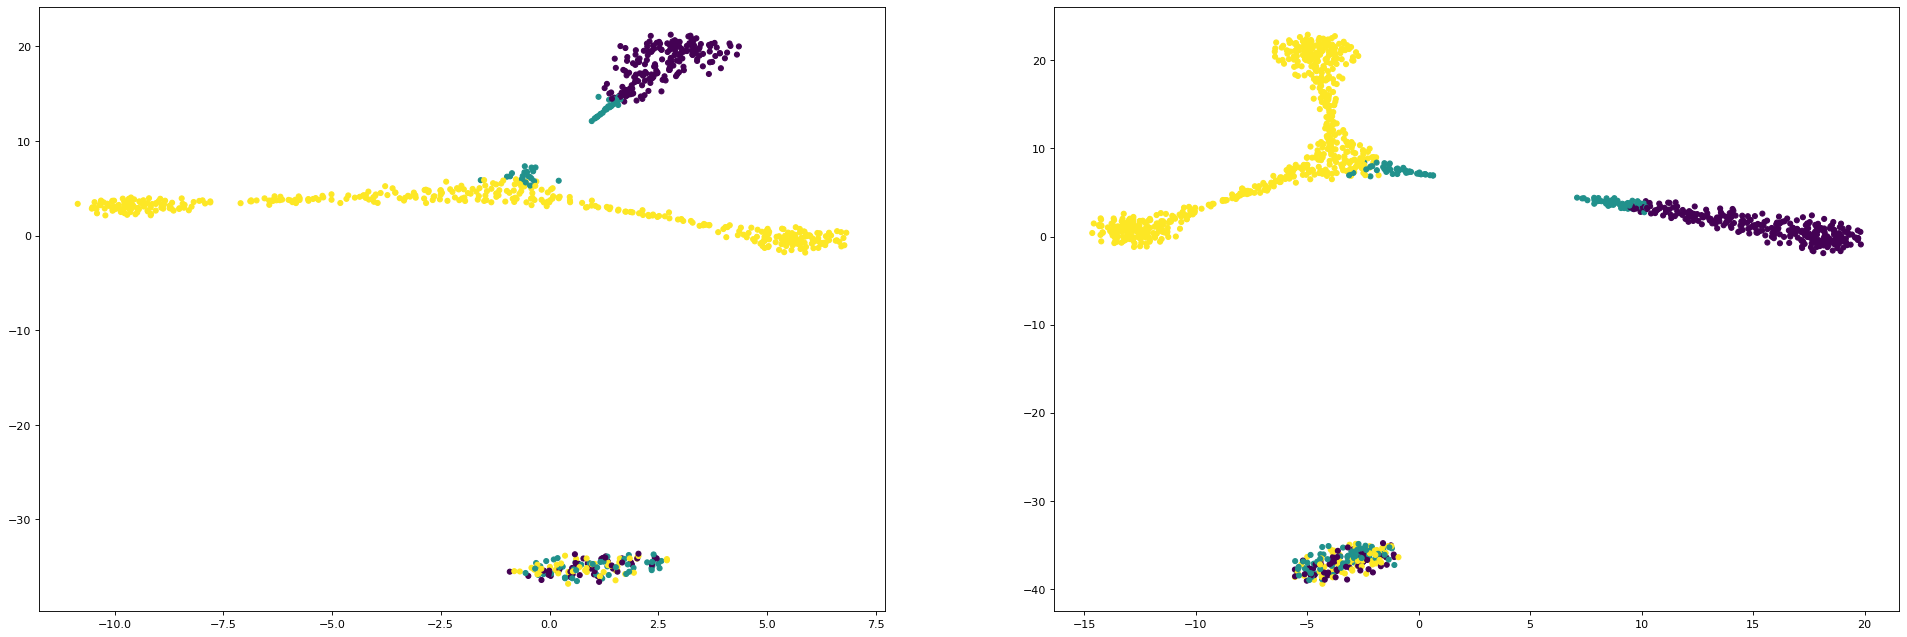

In [16]:
ts1 = ts1_list[0]
ts2 = ts2_list[0]
final_embedding_plot(ts1_list[0], ts2_list[0], timepoint1, timepoint2)

<ipython-input-15-e0c76296abbf>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  qqqq = ax.figure.show()


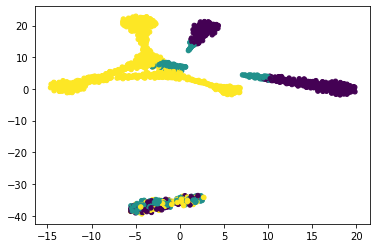

In [17]:
plot_togather(ts1_list[0], ts2_list[0], timepoint1, timepoint2)

In [9]:
ts1.y2d.shape, ts2.y2d.shape

((800, 2), (800, 2))

In [57]:
ts1.mmd_loss[0].numpy()

0.0021011904